In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn. metrics import roc_curve, auc
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
from sklearn. metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

In [2]:
def calculate_metrics(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)
    predictive_accuracy = (tp + tn) / (tp + tn + fp + fn)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return sensitivity, specificity, ppv, npv, predictive_accuracy, mcc

In [3]:
data = pd.read_excel("C:\\Users\\12292\\Desktop\\train size - xx (2).xlsx")

In [4]:
train_X = data.iloc[:, 1:]  # Features (excluding the first column)
train_y = data.iloc[:, 0] 

In [5]:
data_test = pd.read_excel("C:\\Users\\12292\\Desktop\\test size - xx (2).xlsx")

In [6]:
test_y = data_test.iloc[:, 0] 
test_X = data_test.iloc[:, 1:] 
test_X

,BNF,PHASES,Radscore
0,1.599177,6,-0.199217
1,1.277627,4,0.417314
2,0.932445,1,-0.781816
3,0.956438,5,-0.183729
4,1.548727,3,-0.510796
...,...,...,...
137,1.190633,4,-1.118190
138,1.035633,0,-1.140353
139,1.178697,4,1.206319
140,1.069052,0,-1.283198


In [7]:
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Max_depth
# min_child_weight

In [8]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the XGBClassifier
xgb_model = xgb.XGBClassifier(random_state=520)

# Define the updated grid of hyperparameters to search
param_grid = {
    'max_depth': list(range(2, 10)),  # Adjust the range according to your preference
    'min_child_weight': list(range(2, 10))  # Adjust the range according to your preference
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(train_X, train_y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation AUC: {best_score}")

Best parameters: {'max_depth': 4, 'min_child_weight': 9}
Best cross-validation AUC: 0.8200534759358289


In [ ]:
# Subsample
# Colsample_bytree

In [9]:
xgb_model = xgb.XGBClassifier(max_depth=4, min_child_weight=9, random_state=520)

# Define the new grid of hyperparameters to search
param_grid = {
    'subsample': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(train_X, train_y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")

Best parameters: {'colsample_bytree': 0.3, 'subsample': 0.5}
Best cross-validation accuracy: 0.8350267379679144


In [ ]:
# n_estimators
# learning_rate

In [10]:
xgb_model = xgb.XGBClassifier(colsample_bytree=0.3,subsample=0.5,max_depth=4, min_child_weight=9, random_state=520)

# Define the new grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 150,200, 250, 300, 350],
    'learning_rate': [0.01,0.02,0.03,0.04,0.05]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(train_X, train_y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")

Best parameters: {'learning_rate': 0.01, 'n_estimators': 250}
Best cross-validation accuracy: 0.8349376114081997


In [11]:
import xgboost as xgb

# Define the model with the specified parameters
xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.3,
    subsample=0.5,
    max_depth=4,
    min_child_weight=9,
    random_state=520,
    learning_rate=0.01,
    n_estimators=250
)

# Now you can fit this model to your training data
xgb_model.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=520, ...)

In [12]:
train_y_pred_proba = xgb_model.predict_proba(train_X)[:, 1]
test_y_pred_proba = xgb_model.predict_proba(test_X)[:, 1]

# Calculate the AUC for both sets
train_xgb_auc = roc_auc_score(train_y, train_y_pred_proba)
test_xgb_auc = roc_auc_score(test_y, test_y_pred_proba)

print(f"Training AUC: {train_xgb_auc}")
print(f"Testing AUC: {test_xgb_auc}")

Training AUC: 0.9161546338965694
Testing AUC: 0.8850746268656716


In [ ]:
# Normally, you could stop at this point, 
# but for a more visually appealing calibration curve, manual adjustment of hyperparameters is still required.

In [13]:
clf_1_list = [
    (xgb_model, "XGB")
]

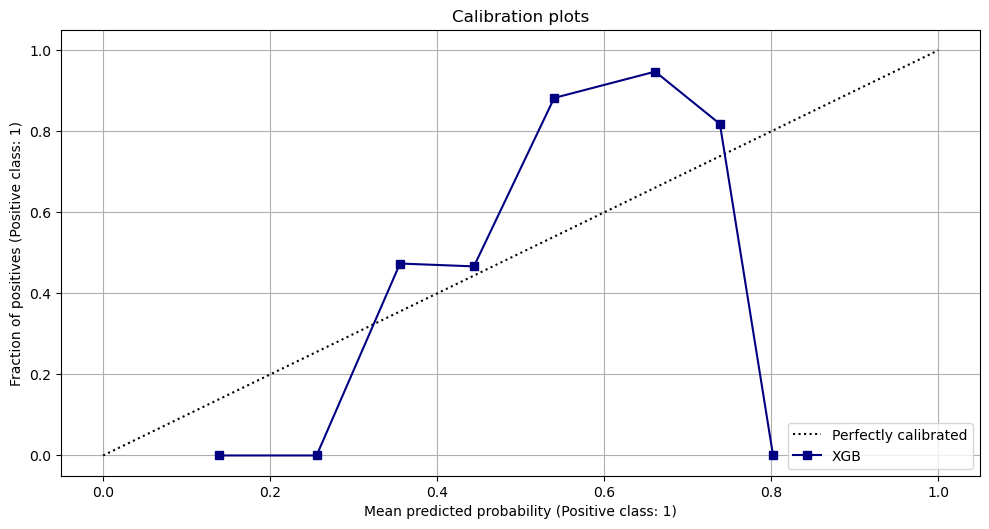

In [14]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
import numpy as np
import random

np.random.seed(321)
random.seed(321)

# Create figure and subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)

# Create subplot for calibration curves
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Combine classifier lists
combined_clf_list = list(clf_1_list)  # Assuming clf_list and clf_1_list are lists of (classifier, name) tuples

# Define color list
colors = ["navy", "darkorange", "red", "green", "pink", "blue", "purple", "yellow", "cyan", "magenta", "brown", "olive", "teal"]

# Plot calibration curve for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train the model
    color = colors[i % len(colors)]  # Cycle through colors
    display = CalibrationDisplay.from_estimator(
        clf,  # Using the classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=color
    )

plt.tight_layout()
#plt.savefig("CalibrationPlots1.pdf")  # Save as PDF
plt.show()  # Display the plot


In [ ]:
#..........

In [ ]:
# After multiple rounds of adjustments, 
# the final model will have an aesthetically pleasing calibration curve, 
# with other metrics falling within acceptable ranges. 
# There will certainly be other optimal hyperparameters, 
# but due to time constraints, achieving a satisfactory result is sufficient.

In [ ]:
#Here is my Final Model XGB

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import xgboost as xgb
best_model_XGB = xgb.XGBClassifier(n_estimators=254, learning_rate=0.0395, max_depth=3, min_child_weight=7,colsample_bytree=0.4, 
                                   subsample=0.4,random_state=527)



best_model_XGB.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0395, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=254, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=527, ...)

In [208]:
XGB_train_y_pred = best_model_XGB.predict(train_X)
XGBboost_train_y_score = best_model_XGB.predict_proba(train_X)[:, 1]
fprXGB,tprXGB,threshold = roc_curve(train_y,XGBboost_train_y_score)
auc(fprXGB,tprXGB)

0.9128081340062908

In [209]:
XGB_y_pred = best_model_XGB.predict(test_X)
XGBboost_y_score = best_model_XGB.predict_proba(test_X)[:, 1]
fprxgb,tprxgb,threshold = roc_curve(test_y,XGBboost_y_score)
auc(fprxgb,tprxgb)

0.8877611940298507

In [210]:
from sklearn.metrics import roc_auc_score, roc_curve
train_y_prob =best_model_XGB.predict_proba(train_X)[:, 1]

# AUC
train_auc = roc_auc_score(train_y, train_y_prob)

In [211]:
def calculate_metrics(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)
    predictive_accuracy = (tp + tn) / (tp + tn + fp + fn)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return sensitivity, specificity, ppv, npv, predictive_accuracy, mcc

In [212]:
# Metrics
sensitivity_train, specificity_train, ppv_train, npv_train, predictive_accuracy_train, mcc_train = calculate_metrics(train_y,XGB_train_y_pred)
sensitivity_test, specificity_test, ppv_test, npv_test, predictive_accuracy_test, mcc_test = calculate_metrics(test_y,XGB_y_pred)


print("Train Set Metrics:")
print(f"Sensitivity: {sensitivity_train:.4f}")
print(f"Specificity: {specificity_train:.4f}")
print(f"PPV (Precision): {ppv_train:.4f}")
print(f"NPV: {npv_train:.4f}")
print(f"Predictive Accuracy: {predictive_accuracy_train:.4f}")
print(f"MCC: {mcc_train:.4f}")

print("\nTest Set Metrics:")
print(f"Sensitivity: {sensitivity_test:.4f}")
print(f"Specificity: {specificity_test:.4f}")
print(f"PPV (Precision): {ppv_test:.3f}")
print(f"NPV: {npv_test:.4f}")
print(f"Predictive Accuracy: {predictive_accuracy_test:.4f}")
print(f"MCC: {mcc_test:.4f}")

Train Set Metrics:
Sensitivity: 0.8367
Specificity: 0.8441
PPV (Precision): 0.8092
NPV: 0.8674
Predictive Accuracy: 0.8408
MCC: 0.6787

Test Set Metrics:
Sensitivity: 0.7612
Specificity: 0.8667
PPV (Precision): 0.836
NPV: 0.8025
Predictive Accuracy: 0.8169
MCC: 0.6332


Training AUC： 0.9128081340062908


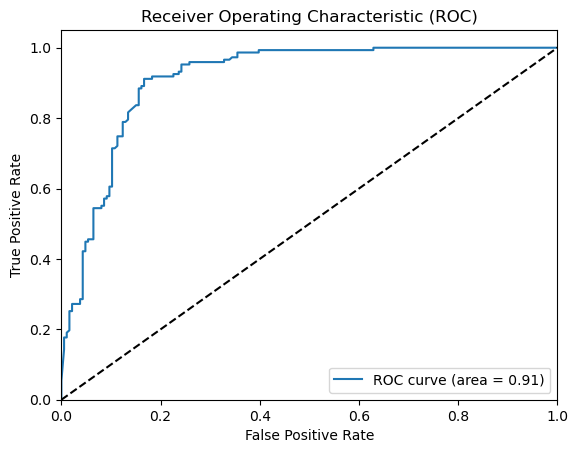

In [213]:
train_auc = roc_auc_score(train_y, train_y_prob)
print("Training AUC：", train_auc)

fprXGB,tprXGB, thresholds = roc_curve(train_y, train_y_prob)
plt.plot(fprXGB,tprXGB, label='ROC curve (area = %0.2f)' % train_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [214]:
import numpy as np  
from scipy.stats import chi2_contingency  

def hosmer_lemeshow_test(test_y, XGB_y_pred , num_groups=10):  
    # Sort the data based on predicted probabilities  
    sorted_indices = np.argsort(XGB_y_pred)  
    sorted_y = test_y[sorted_indices]  
    
    # Create groups based on the sorted indices  
    group_size = len(sorted_y) // num_groups  
    group_bounds = np.arange(0, len(sorted_y) + 1, group_size)  
    
    # Calculate observed and expected counts for each group  
    observed_counts = np.zeros(num_groups)  
    expected_counts = np.zeros(num_groups)  
    
    total_positive = np.sum(sorted_y)  
    total_negative = len(sorted_y) - total_positive  
    
    for i in range(num_groups):  
        start, end = group_bounds[i], group_bounds[i + 1]  
        observed_counts[i] = np.sum(sorted_y[start:end])  
        expected_counts[i] = (end - start) * total_positive / len(sorted_y)  
        
    # Perform chi-squared test  
    chi2, p = chi2_contingency(np.array([observed_counts, expected_counts]).T)[:2]  
    
    dof = num_groups - 2  # Degrees of freedom for chi-squared test
      
    return chi2, p, dof  

chi2, p_value, dof = hosmer_lemeshow_test(test_y,XGB_y_pred)  
print(f"Chi-squared: {chi2}")  
print(f"P-value: {p_value}")  
print(f"Degrees of freedom: {dof}")

# Determine model calibration based on p-value
if p_value < 0.05:
    print("Model calibration is poor")
else:
    print("Model calibration is good")


Chi-squared: 16.102124381629054
P-value: 0.06477934921791016
Degrees of freedom: 8
Model calibration is good


In [215]:
clf_1_list = [
    (best_model_XGB, "best_XGB")
]

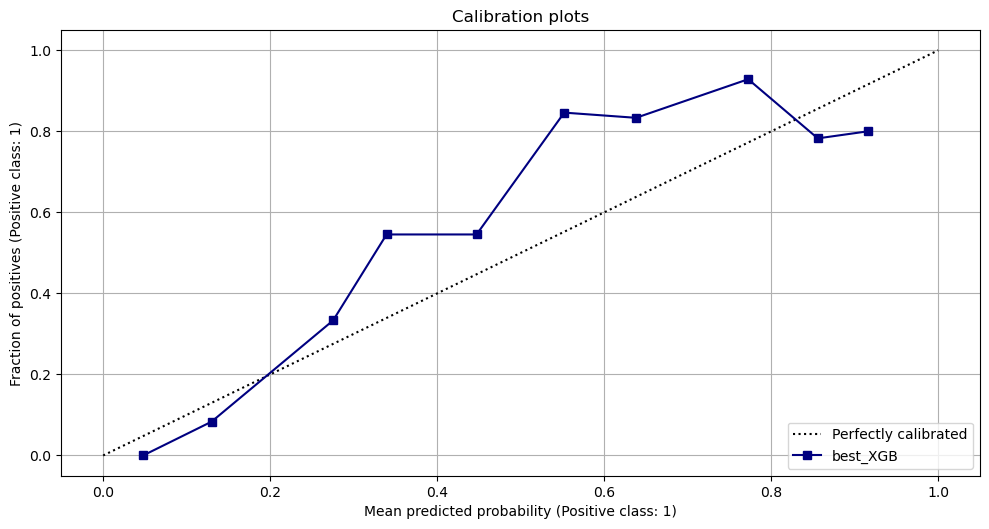

In [216]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
import numpy as np
import random

np.random.seed(321)
random.seed(321)

# Create figure and subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)

# Create subplot for calibration curves
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Combine classifier lists
combined_clf_list = list(clf_1_list)  # Assuming clf_list and clf_1_list are lists of (classifier, name) tuples

# Define color list
colors = ["navy", "darkorange", "red", "green", "pink", "blue", "purple", "yellow", "cyan", "magenta", "brown", "olive", "teal"]

# Plot calibration curve for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train the model
    color = colors[i % len(colors)]  # Cycle through colors
    display = CalibrationDisplay.from_estimator(
        clf,  # Using the classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=color
    )

plt.tight_layout()
#plt.savefig("CalibrationPlots1.pdf")  # Save as PDF
plt.show()  # Display the plot


In [217]:
y_pred =XGB_y_pred

Model: best_model_XGB, Trained model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0395, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=254, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=527, ...)


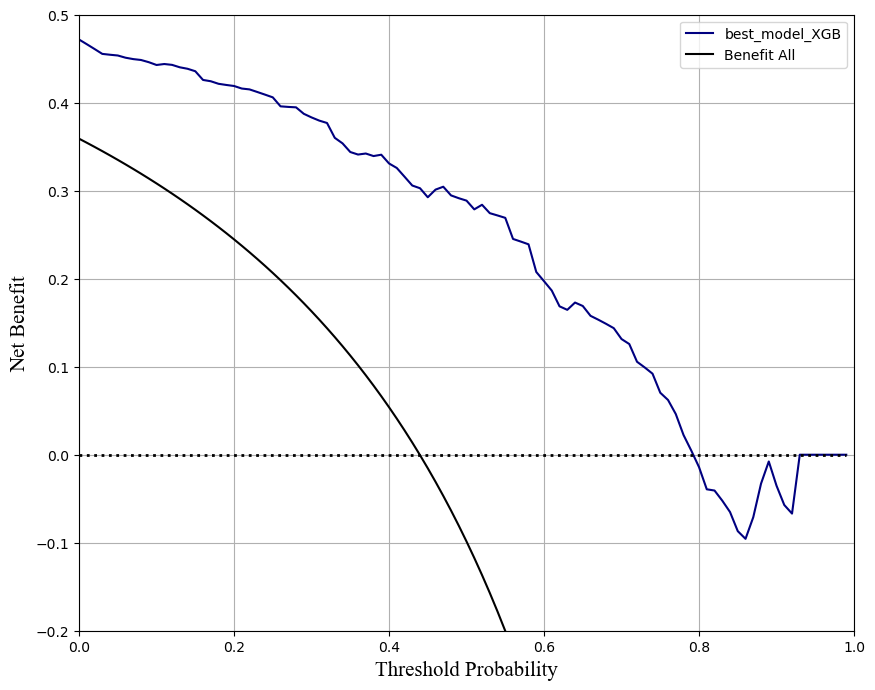

In [218]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
plt.figure(figsize=(10, 8))
np.random.seed(321)
random.seed(321)
 
models = [
    ("best_model_XGB",best_model_XGB)
]

def net_benefit_model(test_y,y_prob,thresh_group):
    total = test_y.shape[0]
    net_model = np.array([])
    for thresh in thresh_group:
        y_pred = y_prob > thresh
        tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
        net_benefit = tp/total-fp/total*(thresh/(1-thresh))
        net_model = np.append(net_model,net_benefit)
    return net_model
 
def net_benefit_all(test_y,thresh_group):
    tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
    total = test_y.shape[0]
    net_all = np.array([])
    for thresh in thresh_group:
        net_benefit = (tp)/total - (tn)/total*(thresh/(1-thresh))
        net_all = np.append(net_all, net_benefit)
    return net_all
 
thresh_group = []
for i in range(0,100,1):
    thresh = i/100
    thresh_group.append(thresh)
 
color = ["navy","darkorange", "red", "green", "pink", "blue", "purple", "yellow", "cyan", "magenta", "brown", "olive", "teal"]
a = 0
benefit_all = net_benefit_all(test_y,thresh_group)
benefit_models = []
y2 = np.maximum(benefit_all, 0)
plt.xlim(0,1)
 
for name, model in models:
    clf = model.fit(train_X, train_y)
    print(f"Model: {name}, Trained model: {clf}")
    y_prob = clf.predict_proba(test_X)[:, 1]
    benefit_model = net_benefit_model(test_y, y_prob, thresh_group)
    plt.plot(thresh_group, benefit_model, color=color[a], label=name)
    a += 1
    benefit_models.append(benefit_model)

 
plt.plot(thresh_group, benefit_all, color='black', label='Benefit All')
plt.plot(thresh_group, np.zeros(len(thresh_group)), color='k', lw=2, linestyle=':')

plt.ylim(-0.2, 0.5)  # Adjusts the y-axis range
plt.xlabel('Threshold Probability', fontdict={'family': 'Times New Roman', 'fontsize': 15})
plt.ylabel('Net Benefit', fontdict={'family': 'Times New Roman', 'fontsize': 15})

plt.grid('major')

# Get the current axes, allowing access to the spines
#ax = plt.gca()

# Set spine colors
#ax.spines['right'].set_color((0.8, 0.8, 0.8))
#ax.spines['top'].set_color((0.8, 0.8, 0.8))

plt.legend(loc='upper right')

# To save the plot as a PDF
#plt.savefig('C:/Users/12292/Desktop/myplo1t.pdf', format='pdf')

plt.show()

In [ ]:
# Thanks for your Watching